In [18]:
# Tensorflow example
# Much of this code is adapted from the Manning liveProject 
#     "Monitoring Changes in Surface Water Using Satellite Image Data"

# Imports and global settings

In [24]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [1]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [4]:
tf.config.list_physical_devices('GPU')   # good to know; may need to select -cpu options
                                         # empty list [] means no GPU

[]

In [5]:
from tensorflow.python.keras.layers import Dense, Flatten, Dropout, BatchNormalization

# Read or select data

In [12]:
# Trial run with a classic data set -- handwritten numbers
mnist = tf.keras.datasets.mnist  # these are the number images

# these can be loaded directly into train and test - note that this is NOT the same order as train_test_split()
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [13]:
# I've seen these images rescaled so that they are 0 to 1 instead of 0 to 255; not sure if/why we need this
# x_train, x_test = x_train / 255.0, x_test / 255.0

In [15]:
# print some info about this classic data set
print("{} train examples, {} test examples".format(X_train.shape[0],X_test.shape[0]))
print("Image shapes are {}".format(X_train[0].shape))   # get the shape of the first image in the train set

60000 train examples, 10000 test examples
Image shapes are (28, 28)


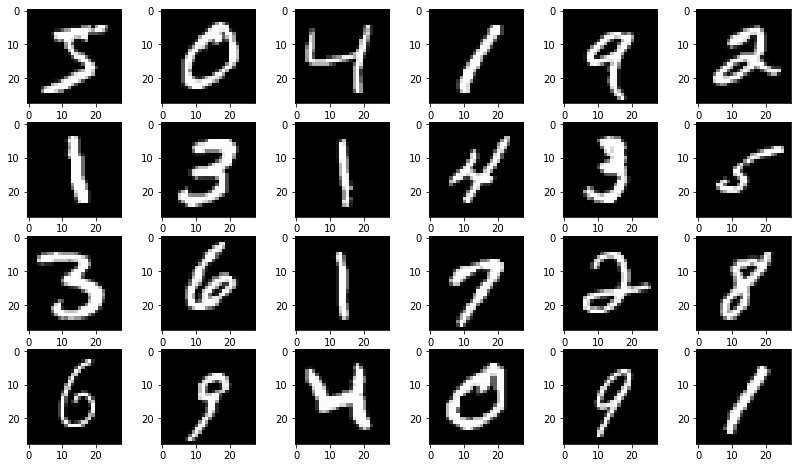

In [17]:
# Look at some of the images in the set
fig = plt.figure(figsize=(14,8))

# plan 24 images
ax_list = []
for i in range(24):
    ax = fig.add_subplot(4,6,i+1)
    ax.imshow(X_train[i],cmap='gray')
    ax_list.append(ax)

# Create a simple neural network

In [19]:
# Very simple example -- we can expand on this

# Instantiating this kind of model has more steps; you kind of build yourself a sandwich instead of
#    passing hyperparameters
model = tf.keras.models.Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, activation='relu'))     # single hidden layer, 'rectified linear unit' or relu
model.add(Dropout(0.2))                            # drop 20% of neurons, selected randomly
model.add(Dense(units=10, activation='softmax'))   # softmax - it's like the logistic regression that decides
                # the answer -- this is the piece that does the final classification into 1 of 10 classes
                # the 10 classes are, of course: 0 1 2 3 4 5 6 7 8 9
                # see https://towardsdatascience.com/softmax-function-simplified-714068bf8156

In [20]:
# Like all the models we've used, you can find out some stuff about it
model.summary()   # what's in it -- for keras/tf, this means the layers
model.layers
model.inputs
model.outputs

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


[<tf.Tensor 'dense_1/Identity:0' shape=(None, 10) dtype=float32>]

In [21]:
# Keras/TF model needs to be compiled -- this is more like the hyperparameters we're used to, I think
model.compile(optimizer='adam', # this will do gradient descent to solve; there might be other options
             loss = 'sparse_categorical_crossentropy', # this is our loss function, categorical problem
                                                       # this probably also has other options
             metrics=['accuracy']  # you can tell it to do other metrics; they aren't used during training
                                   # like the loss function is, but it'll compute stuff for you
             )

In [22]:
# Train the model
model.fit(X_train, y_train, epochs=5)

# these models have to give a go several times; it'll get better if you give it more epochs, but 
#  it will also take longer. If you go crazy with epochs on a big data set, this can run for days.

Epoch 1/5
1875/1875 [==============================] - 1s 742us/step - loss: 2.3755 - accuracy: 0.7474
Epoch 2/5
1875/1875 [==============================] - 1s 739us/step - loss: 0.6100 - accuracy: 0.8397
Epoch 3/5
1875/1875 [==============================] - 1s 734us/step - loss: 0.4912 - accuracy: 0.8695
Epoch 4/5
1875/1875 [==============================] - 1s 738us/step - loss: 0.4326 - accuracy: 0.8900
Epoch 5/5
1875/1875 [==============================] - 1s 737us/step - loss: 0.3868 - accuracy: 0.9005


In [23]:
# Evaluate the model
model.evaluate(X_test, y_test, verbose=1)
# accuracy for me after 5 epochs as 0.9345

313/313 [==============================] - 0s 614us/step - loss: 0.3094 - accuracy: 0.9345


[0.30937880277633667, 0.934499979019165]

In [28]:
# Get predictions so we can look at the confusion matrix
y_pred = model.predict(X_test)
y_pred

array([[0.0000000e+00, 0.0000000e+00, 1.8506694e-37, ..., 1.0000000e+00,
        0.0000000e+00, 2.1470608e-21],
       [6.8561633e-15, 4.3870664e-11, 1.0000000e+00, ..., 6.7091815e-22,
        3.5987112e-13, 9.5590266e-27],
       [4.1551538e-29, 9.9999821e-01, 2.9906215e-09, ..., 1.8231432e-06,
        3.6636302e-11, 4.2827495e-12],
       ...,
       [4.5356354e-33, 4.5110823e-10, 3.8138931e-21, ..., 4.4748285e-12,
        2.4836304e-15, 2.2847639e-09],
       [1.6696619e-09, 2.6285484e-11, 2.0482930e-13, ..., 1.0085598e-03,
        5.0422512e-03, 8.5805514e-09],
       [4.8836105e-21, 3.2359655e-31, 5.0356051e-18, ..., 0.0000000e+00,
        2.5120242e-23, 2.4485122e-31]], dtype=float32)

In [29]:
# Need to conver the y_pred to run the confusion matrix, but I don't know why yet...
y_pred_convert = tf.argmax(y_pred, axis=1)
y_pred_convert

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([7, 2, 1, ..., 4, 5, 6])>

In [30]:
# Compute confusion matrix
confusion_matrix(y_test,y_pred_convert)
# large numbers on the diagonal are good; any numbers not on the diagonal are bad predictions

array([[ 951,    0,    3,    0,    1,    0,    2,    3,   20,    0],
       [   0, 1081,   10,    4,    2,    1,    1,    0,   36,    0],
       [   4,    0,  985,    6,    3,    0,    2,    7,   21,    4],
       [   1,    0,   13,  943,    0,   14,    0,   11,   24,    4],
       [   0,    0,    5,    1,  905,    0,    6,    1,   10,   54],
       [   3,    0,    2,   27,    0,  788,    9,   12,   37,   14],
       [   6,    1,    5,    0,    6,    3,  917,    2,   18,    0],
       [   2,    2,   31,    2,    9,    0,    0,  952,    4,   26],
       [   3,    1,   19,   19,   13,    4,    3,   11,  887,   14],
       [   2,    4,    1,   12,   21,    5,    2,   11,   15,  936]])